# Random walk

- [Model system 1D](#model)
- [As binomial distribution](#bd)
- [As normal distribution](#nd)
- [Computer simulation](#simulation)
- [Connection with the diffusion constant](#diffusion)

<div id="model" />

## Model system 1D

Because the word "random walk" is translated as "drunken steps", I will use this analogy to explain it.

Let us consider the probability distribution function ${P}(l,m)$ of finding a drunken man at the location $L=l$ after $M=m$ steps. He was initially at the origin ($l=0$ at $m=0$) and made $m$ random steps $s_i=-1\ {\rm or}\ 1$ until now, where $s_i=-1$ means to take a step to the left and $+1$ to the right. Therefore $l=\sum_{i=1}^m s_i$.

![](images/random_walk.png)

To avoid the complications, we will consider a 1-dimensional random walk here.

The goal of this part is to obtain the probability distribution function $P(l,m)$ of finding the drunken man at the location $L=l$ after $m$ steps.

Therefore the the location $l$ of the drunken man is given by the sum of single steps $s_i$ from the 1st step $i=1$ to the $m$-th step.

<div id="bd" />

## As binomial distribution

Let us try to evaluate $P(l,m)$ using binomial distribution function.

We introduce two variables namely $n_+$, the total number of steps to the right, and $n_-$, The total number of steps to the left. Then the total number of steps $m$ is represented as $n_+ + n_−$, and the current location $l$ is represented as $n_+ - n_−$.

Solving for $n_+$ and $n_-$, we obtain Eq.(E1). Using  $n_+$ or $n_-$, the probability distribution function $P(l,m)$ can be estimated using binomial distribution function $P_{Binomial}$ of obtaining $n_+$ right steps in $m$ total steps or equivalently obtaining $n_-$ steps in $m$ steps.

We already know that such probabilities are given explicitly by the form of Eq.(E3).

- The total number of steps to the right: $n_+$
- The total number of steps to the left: $n_-$
- The total number of steps: $m=n_+ + n_-$
- The current location: $l=n_+ - n_-$

\begin{equation}
n_+=\frac{m+l}{2}, \ \ \ \ \ \ n_-=\frac{m-l}{2}\tag{E1}
\end{equation}

\begin{equation}
%\tilde
{P}(l,m)\rightarrow P_{\rm Binomial}(n_+;m)
%\frac{dn_+}{dl}
=P_{\rm Binomial}(n_-;m)
%\frac{dn_-}{dl}
\tag{E2}
\end{equation}

\begin{equation}
\hspace{20mm}
=
%\frac{1}{2}
\frac{m!}{n_+!(m-n_+)!}{{p}^{n_+}}{{(1-p)}^{m-n_+}}\tag{E3}
\end{equation}

<div id="nd" />

## As normal distribution (for $n_+,m\gg 1$)

When $n_+$ and $m$ are much larger than 1, we know that the binomial distribution function becomes equivalent to normal distribution shown in Eq.(E4) with the average and the variance for $n_+$ shown in Eqs.(E5) and (E6).

Recall that $n_+$ is equal to $m+l$ devided by 2, binomial distribution function appeared in Eq.(E4) can be rewritten to Eq.(E7) s a function of $l$.

Therefore the aimed probability distribution function $P(l,m)$ is obtained as Eq.(E9) with the average and the variance for $l$ shown in Eqs.(E10) and (E11).

\begin{equation}
P_{\rm Binomial}(n_+;m)
%\xrightarrow[n_+\to cont.]{n_+,m\gg 1}\ 
\simeq
\frac{1}{\sqrt{2\pi {{\sigma'}^{2}}}}\exp \left[ -\frac{{{(n_+-{{\mu' }_{1}})}^{2}}}{2{{\sigma' }^{2}}} \right]\tag{E4}
\end{equation}

\begin{equation}
{\rm with}\hspace{5mm}
\mu_1'=\langle n_+\rangle=mp,\ \ \ 
\sigma'^2=\langle n_+^2\rangle - \langle n_+\rangle^2=mp(1-p) \tag{E5, E6}
\end{equation}

- Recall that $n_+=(m+l)~/~2$

\begin{equation}
P_{\rm Binomial}(n_+;m)
%\rightarrow\frac{1}{\sqrt{2\pi mp(1-p)}}
\simeq\exp \left[ -\frac{{{(l-{m(2p-1)})}^{2}}}{8mp(1-p)} \right]\tag{E7}
\end{equation}

\begin{equation}
\therefore \ \ 
%\tilde
{P}(l,m)= P_{\rm Binomial}(n_+;m)\frac{dn_+}{dl}
= P_{\rm Binomial}(n_+;m)\frac{1}{2}\tag{E8}
\end{equation}

\begin{equation}
\simeq\frac{1}{\sqrt{2\pi \sigma''^2}}
\exp \left[ -\frac{{{(l-{\mu''_1})}^{2}}}{2\sigma''^2} \right]\tag{E9}
\end{equation}

\begin{equation}
%\hspace{20mm}
{\rm with}\hspace{5mm}
\mu''_1=\langle l\rangle=m(2p-1),\ \ \ 
\sigma''^2=\langle l^2\rangle - \langle l\rangle^2=4mp(1-p) \tag{E10, E11}
\end{equation}

<div id="simulation" />

## Computer simulation

In the beginning, we set $p=0.5$ representing that the drunken man has equal probabilities for moving right or left, then set the number of total steps $M=1,000$ and the number of independent random walkers $N=100,000$. The average and the standard deviation for the current location $l$ are calculated using Eqs.(E10) and (E11).

After initialize the component of an array $L$ to be all zero, we generate random sampling from -1 or +1 M times and store them as step at the 10th line, then calculate the location $l$ by accumulating all steps and store it as L at the 11th line.

By running this code example, you see that the aimed probability distribution function $P(l,m)$ is perfectly represented by Eqs.(E9) to (E11).

You may repeat the same simulation by choosing different values of total steps, for example `M= [100, 1000, 10000, 100,000]` to see how the distribution changes with the number of total steps.

/home/ah/Git/physics_projects/.stochastiic-venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


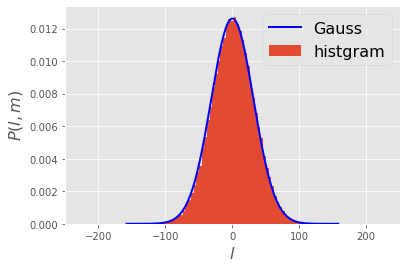

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

p = 0.5
M = 1000
N = 100000
ave = M*(2*p-1) # average of the location L after M steps Eq.(E10)
std = np.sqrt(4*M*p*(1 - p)) # standard deviation of L after M steps Eq.(E11)

L = np.zeros(N)
np.random.seed(0)

for i in range(N): # repeat independent random walks N times
    step = np.random.choice([-1, 1], M) # generate random sampling from -1 or +1 M times and store them as step
    L[i] = np.sum(step) # calculate l after making M random steps and store it as L

nmin = np.int(ave - std*5)
nmax = np.int(ave + std*5)
nbin = np.int((nmax - nmin)/4)
plt.hist(L, range=[nmin, nmax], bins=nbin, density=True)

x = np.arange(nmin, nmax, 0.01/std)
y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical distribution Eq.(E9)

plt.plot(x, y, lw=2, color="b")
plt.xlabel(r"$l$", fontsize=16)
plt.ylabel(r"$P(l,m)$", fontsize=16)
plt.legend([r"Gauss", r"histgram"], fontsize=16)
plt.xlim(ave - 250, ave + 250)
plt.show()

<div id="diffusion" />

## Connection with the diffusion constant $D$

**$P(x,t)$ from random walk**

Let us discuss the property of random walk in connection with the diffusion constant $D$.

To this end, we define two constants, namely the length of a single step $a$ and the time between subsequent steps $t_s$. Here we consider a drift free case where $p=0.5$ and thus the average of $l$ is 0. Using $a$ and $t_s$, we define the position of the random walker as $x$, which is equal to $a$ multiplied with the current location $l$, and the duration of time for making $m$ steps as $t_s$, which is equal to $t_s$ multiplied with the number of total steps $m$.

Taking care of the normalization as shown in Eq.(E12), the probability distribution function $P(l,m)$ can be converted to $P(x,t)$ as shown in Eqs.(E13) to (E16). Note that the variance of the position $x$ is now given by a function of time $t$ not the number of steps $m$.

Here we consider a drift free case $p=0.5$, i.e., $\mu_1=\langle l\rangle=m(2p-1)=0$.

\begin{equation}
P(x,t)=P(l,m)\frac{dl}{dx}=P(l,m)\frac{1}{a}
\tag{E12}
\end{equation}

\begin{equation}
%P_{\rm Binomial}(n_+;m)\rightarrow
=\frac{1}{a\sqrt{8\pi mp(1-p)}}
\exp \left[ -\frac{{l^2}}{8mp(1-p)} \right]\tag{E13}
\end{equation}

\begin{equation}
%P_{\rm Binomial}(n_+;m)\rightarrow
=\frac{1}{\sqrt{8\pi a^2 p(1-p)t/t_s}}
\exp \left[ -\frac{{x^2}}{8a^2p(1-p)t/t_s} \right]\tag{E14}
\end{equation}


\begin{equation}
\hspace{-10mm}
{\rm with}\hspace{5mm}
\mu_1=\langle x\rangle=0,\ \  
\sigma^2=\langle x^2\rangle - \langle x\rangle^2=4a^2p(1-p)t/t_s \tag{E15, E16}
\end{equation}

**$P(x,t)$ from the diffusion equation**

If we solve the diffusion equation defined with a diffusion constant $D$ as follows. 

\begin{equation}
\frac{\partial}{\partial t} P(x,t)=D\frac{\partial ^2}{\partial x^2} P(x,t)
\tag{E17}
\end{equation}

\begin{equation}
{\rm with}\hspace{5mm}P(x,t=0)=\delta(x)
\tag{E18}
\end{equation}

The solution is given by

\begin{equation}
P(x,t)=\frac{1}{\sqrt{4\pi Dt}}
\exp \left[ -\frac{{{x^2}}}{4Dt} \right]\tag{E19}
\end{equation}

By comparing Eqs.(E14) and (E19), we finally obtain the following general formula which relates the diffusion constant $D$ and the variance of the position of random walkers $\sigma^2$, which is also called as the mean square displacement.

\begin{equation}
D=\frac{2a^2p(1-p)}{t_s}=\frac{\sigma^2}{2t}\tag{E20}
\end{equation}